<a href="https://colab.research.google.com/github/farisassallami/Project_2/blob/main/Metabolic_Syndrome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_selector ,  make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/Users/faris/Downloads/untitled folder/Metabolic  Syndrome.csv')

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [4]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


## Dropping 'seqn' column

In [5]:
# We will drop the seqn column which is irrelvant.
df = df.drop(columns='seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


## Checking for duplicate rows

In [6]:
# We will check for duplicate rows and delete them.
dup = df.duplicated().sum()
print(f'There are {dup} duplicate rows.')

There are 0 duplicate rows.


## Creating a Triglycerides/HDL ratio column

In [7]:
# We will create a new column that divides Triglycerides by HDL and create a Tryglyceride-HDL ratio that cardiologists use.
df['Tryglyceride-HDL ratio'] = df['Triglycerides']/df['HDL']


df = df.drop(columns = ['Triglycerides','HDL'])

## Using a for loop to check for inconsistenies

In [8]:
# # checking for inconsistencies in the data 
datatypes = df.dtypes
stringcols = datatypes[datatypes=='object'].index
stringcols

# using for loop to check for inconsistencies 
for i in stringcols:
  print(f'--Column = {i}')
  print(df[i].value_counts(dropna=False))
  print('\n\n')

--Column = Sex
Female    1211
Male      1190
Name: Sex, dtype: int64



--Column = Marital
Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64



--Column = Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64



--Column = MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64





##Changing Sex column name to Is_Male and binary encoding it

In [9]:
df.rename(columns={'Sex':'Is_Male'}, inplace=True)
df['Is_Male'].replace({'Male':1,'Female':0}, inplace=True)
df['Is_Male'].value_counts()

0    1211
1    1190
Name: Is_Male, dtype: int64

In [10]:
df.isna().sum()

Age                         0
Is_Male                     0
Marital                   208
Income                    117
Race                        0
WaistCirc                  85
BMI                        26
Albuminuria                 0
UrAlbCr                     0
UricAcid                    0
BloodGlucose                0
MetabolicSyndrome           0
Tryglyceride-HDL ratio      0
dtype: int64

#Visualisation

##Handling the columns

In [11]:
cat_attributes = df.select_dtypes(include=['object'])
num_attributes = df.select_dtypes(include=['number'])

##Visualizing the numeric features

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Is_Male'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'WaistCirc'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'Albuminuria'}>],
       [<AxesSubplot: title={'center': 'UrAlbCr'}>,
        <AxesSubplot: title={'center': 'UricAcid'}>,
        <AxesSubplot: title={'center': 'BloodGlucose'}>],
       [<AxesSubplot: title={'center': 'Tryglyceride-HDL ratio'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

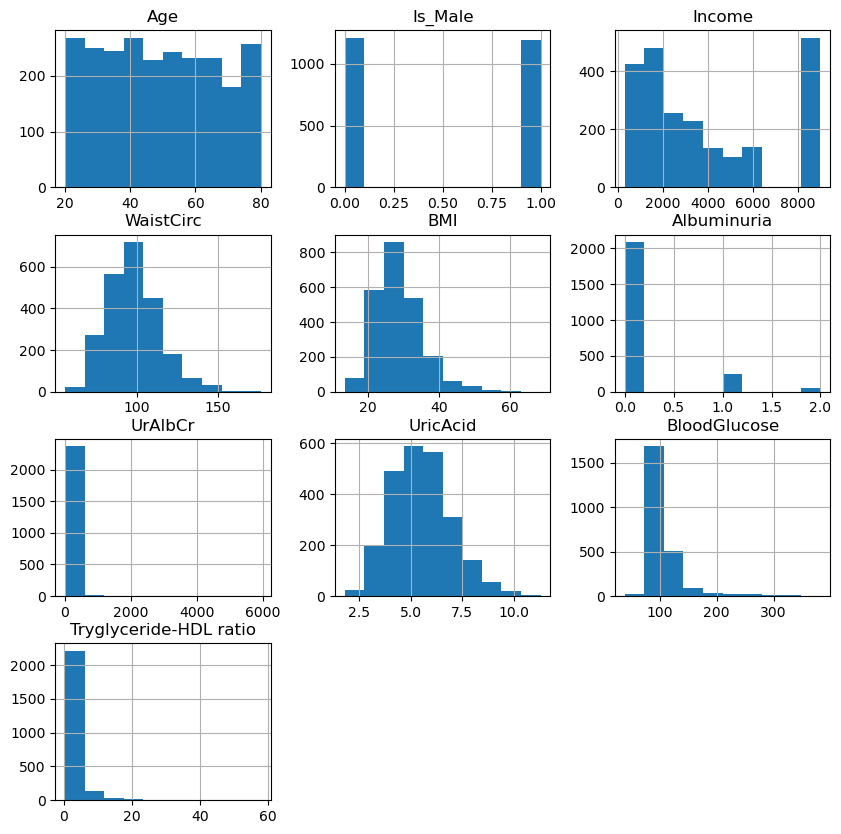

In [12]:
num_attributes.hist(figsize=(10,10))

<AxesSubplot: xlabel='count', ylabel='Race'>

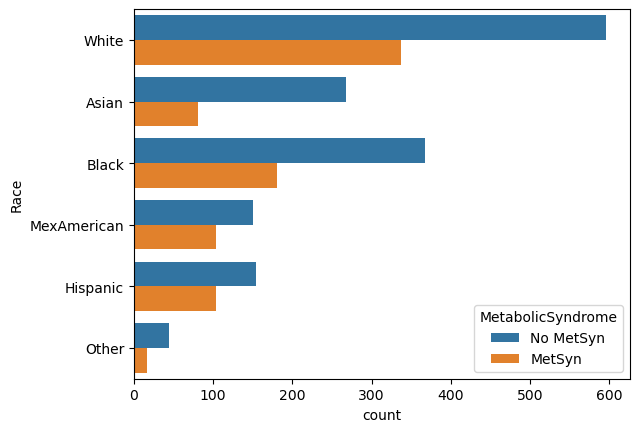

In [13]:
sns.countplot(y='Race', hue='MetabolicSyndrome', data = cat_attributes)

##We can see from the count plot above that the proportion of  Metabolic Syndrome relative to not having it is higher among the Mexican American and Hispanic communities and the lowest among the Asian communities.

## Scatter plot of BMI vs Waist Circumference and MetabolycSyndrome

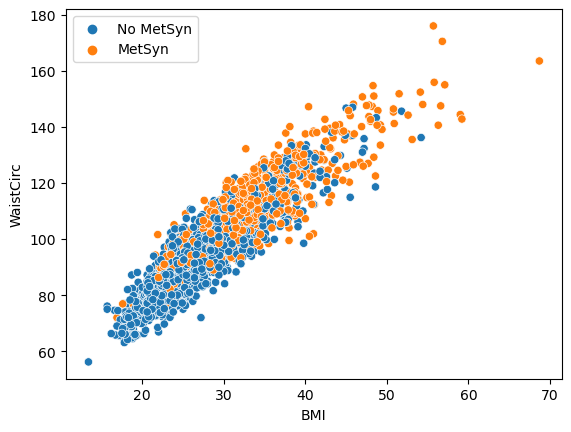

In [14]:

sns.scatterplot(data = df, x = 'BMI', y = 'WaistCirc', hue = 'MetabolicSyndrome')
plt.legend();



##We can see from the scatter plot above that there is a positive relationship between patients who have metabolyc Syndrome and high BMI and Waist circumference.

## Scatter plot of BloodGlucose vs Triglycerides-HDL ratio and MetabolycSyndrome

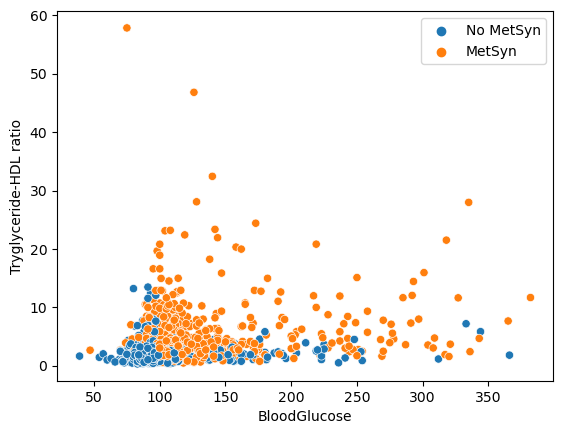

In [15]:

sns.scatterplot(data = df, x = 'BloodGlucose', y = 'Tryglyceride-HDL ratio', hue = 'MetabolicSyndrome')
plt.legend();

##We can see from the scatter plot above that there is a positive relationship between patients who have metabolyc syndrome  and high bloodglucose tended to have heart conditions by having higher Triglyceride-HDL ratios.  Idealy a ratio of 2 or lower is healthy.

#  Preparing the data appropriately for modeling 

##Binary encoding the target feature

In [16]:
df['MetabolicSyndrome'].replace({'No MetSyn':0, 'MetSyn':1}, inplace=True)
df['MetabolicSyndrome'].value_counts()

0    1579
1     822
Name: MetabolicSyndrome, dtype: int64

##Setting up target and features

In [17]:
# Setting X and y
X = df.drop(columns = 'MetabolicSyndrome')
y = df['MetabolicSyndrome']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

##Checking for missing values

In [18]:
# Checking for missing values
print(df.isna().sum())

Age                         0
Is_Male                     0
Marital                   208
Income                    117
Race                        0
WaistCirc                  85
BMI                        26
Albuminuria                 0
UrAlbCr                     0
UricAcid                    0
BloodGlucose                0
MetabolicSyndrome           0
Tryglyceride-HDL ratio      0
dtype: int64


##There are missing values in Marital, Income, WaistCirc and BMI columns.  For Marital we will impute the most frequent value and for the remaining numeric columns we will impute the mean value.

In [19]:
# Initiating transformers

# Imputers
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# One hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Scaler
scaler = StandardScaler()


In [20]:
# Column selectors
nmr_selector = make_column_selector(dtype_include ='number')
ctg_selector = make_column_selector(dtype_include='object')

ctg_clmns = ctg_selector(X_train)
nmr_clmns = nmr_selector(X_train)


In [21]:
# Making pipelines
nmr_pipe = make_pipeline(mean_imputer, scaler)
ctg_pipe = make_pipeline(most_frequent_imputer, ohe)

In [22]:
# Initiating column transformer
nmr_tuple = (nmr_pipe, nmr_selector)
ctg_tuple = (ctg_pipe, ctg_selector)

pre_processor = make_column_transformer(nmr_tuple, ctg_tuple, remainder='passthrough')
pre_processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x139cfbc40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x139cb7340>)])

In [23]:
# Fitting preprocessed train data
pre_processor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x139cfbc40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x139cb7340>)])

In [24]:
# Saving processed train and test data
X_train_processed = pre_processor.transform(X_train)
X_test_processed = pre_processor.transform(X_test)

In [25]:
# Inspecting result
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of train data is', X_train_processed.shape)
print('shape of test data is', X_test_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of train data is (1800, 21)
shape of test data is (601, 21)




#Modeling

##Random forest model

In [26]:
# Default Random Forest Model
# Initiating the model
rf = RandomForestClassifier()

# Making the Pipeline
rf_pipe = make_pipeline(scaler, rf)

# Fitting on Train Data
rf_pipe.fit(X_train_processed, y_train)

# Saving the Predictions
rf_train_pred = rf_pipe.predict(X_train_processed)
rf_test_pred = rf_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       397
           1       0.84      0.75      0.79       204

    accuracy                           0.87       601
   macro avg       0.86      0.84      0.85       601
weighted avg       0.87      0.87      0.86       601



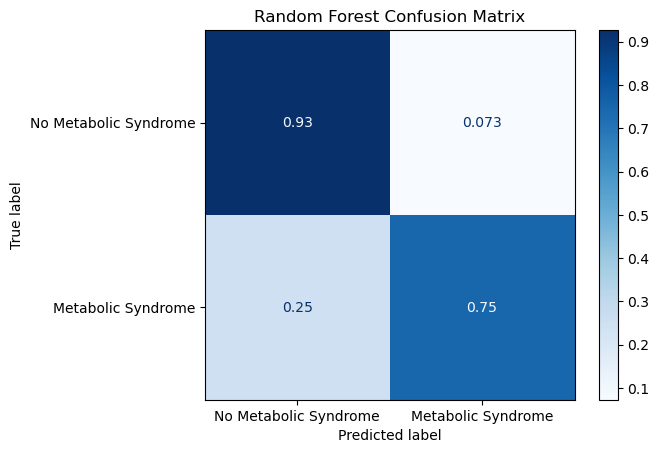

In [27]:
# Confusion Matrix

labels = ['No Metabolic Syndrome', 'Metabolic Syndrome']
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_pred, display_labels=labels , cmap='Blues',normalize='true').ax_.set_title('Random Forest Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rf_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, rf_test_pred))

##We want to tune this random forest model to see if we can reduce type 1 and type 2 errors.  We will use the gridsearch method

In [28]:
# Finding parameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 

In [29]:
# Setting up Parameter Grid
param_grid = {'randomforestclassifier__max_depth': range(2,20),
              'randomforestclassifier__n_estimators': range(90,101)}

In [30]:
# Making instance of gridsearch
rf_gridsearch = GridSearchCV(rf_pipe, param_grid)

# Fitting on Train data
rf_gridsearch.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': range(2, 20),
                         'randomforestclassifier__n_estimators': range(90, 101)})

In [31]:
print('Best Random Forest Parameters:')
print(rf_gridsearch.best_params_)
best_pipe = rf_gridsearch.best_estimator_
print(f'Accuracy of the Best Random Forest Model: {best_pipe.score(X_test_processed, y_test).round(5)}')

Best Random Forest Parameters:
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 98}
Accuracy of the Best Random Forest Model: 0.86356


In [32]:
# Tuned Random Forest Model

# Instance of model using max depth of 14 and n_estimators of 90
rftuned = RandomForestClassifier(max_depth=14, n_estimators=90)

# Making tuned Pipeline
rftuned_pipe = make_pipeline(scaler, rftuned)

# Fitting on Train data
rftuned_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=14, n_estimators=90))])

In [33]:
# Saving Predictions
rftuned_trainpred = rftuned_pipe.predict(X_train_processed)
rftuned_testpred = rftuned_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1182
           1       1.00      1.00      1.00       618

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       397
           1       0.84      0.76      0.80       204

    accuracy                           0.87       601
   macro avg       0.86      0.84      0.85       601
weighted avg       0.87      0.87      0.87       601



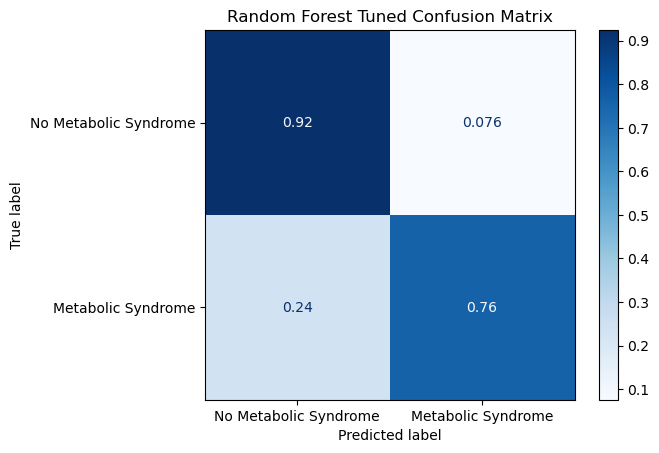

In [34]:
# Tuned Random Forest Model Metrics
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rftuned_testpred, display_labels=labels, cmap='Blues', normalize='true').ax_.set_title('Random Forest Tuned Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, rftuned_trainpred))
print('Test Classification Report', '\n')
print(classification_report(y_test, rftuned_testpred))

##After tuning the random forest model using GridSearchCV, the tuned random forest accuracy remained the same at .87.  Thus, we will prefer the tuned-random forest model because it lowered the type 2 error to .24 when originally it was .25.

##KNN modeling

In [35]:
# Initiating model
knn = KNeighborsClassifier()

# Making Knn Pipeline
knn_pipe = make_pipeline(scaler, knn)

# Fitting on Train data
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [36]:
# Saving Predictions
knn_train_pred = knn_pipe.predict(X_train_processed)
knn_test_pred = knn_pipe.predict(X_test_processed)

Train Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1182
           1       0.84      0.71      0.77       618

    accuracy                           0.85      1800
   macro avg       0.85      0.82      0.83      1800
weighted avg       0.85      0.85      0.85      1800

Test Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       397
           1       0.68      0.53      0.59       204

    accuracy                           0.75       601
   macro avg       0.73      0.70      0.71       601
weighted avg       0.75      0.75      0.75       601



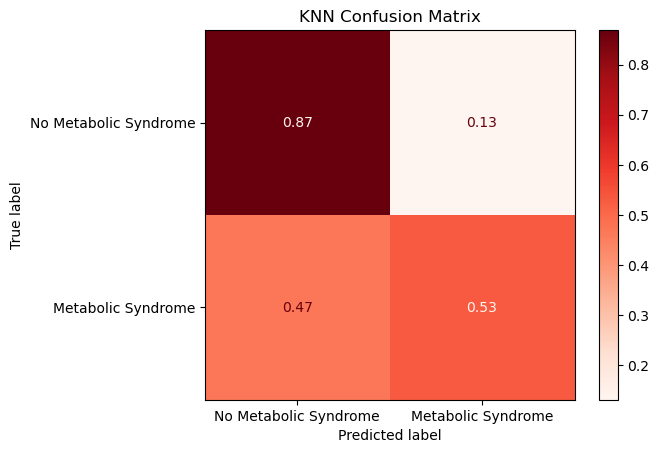

In [37]:
# KNN Model Metrics

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred,display_labels=labels, cmap='Reds', normalize='true').ax_.set_title('KNN Confusion Matrix')

# Classification Report
print('Train Classification Report', '\n')
print(classification_report(y_train, knn_train_pred))
print('Test Classification Report', '\n')
print(classification_report(y_test, knn_test_pred))

##We will use gridsearch to see if we can obtain a higher accuracy

In [38]:
# Tuning KNN Model with GridSearchCV

# Checking Parameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [39]:
# Setting up Parameter Grid
param_grid = {'kneighborsclassifier__n_neighbors': range(1,11),
              'kneighborsclassifier__weights': ['uniform', 'distance']}

In [40]:
# Gridsearch
knn_gridscv = GridSearchCV(knn_pipe, param_grid)

# Fitting on Train data
knn_gridscv.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 11),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [41]:
print('Best KNN Parameters:')
print(knn_gridscv.best_params_)
best_pipe = knn_gridscv.best_estimator_
print(f'Accuracy of the Best KNN Model: {best_pipe.score(X_test_processed, y_test).round(5)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__weights': 'distance'}
Accuracy of the Best KNN Model: 0.76705


#While the tuned KNN model had a higher accuracy than the un-tuned KNN model at 76.705%, overall; the original Random forest model had the highest accuracy of 87% and lowest type 1 & 2 errors than all other models.  For diagnosing metabolic syndrome, its best to have the lowest type 2 error where you minimize the mistake of telling a patient they are healthy while they are actually ill.  The metrics for the best model chosen will be below.




# Based on the 2 scatterplots from earlier above, we can correlate elevated waist circumference, BMI, tryglyceride-hdl ratio, and glucose levels to a patience having metabolic syndrome.  All these features are an indicator of obesity.  Below are 2 recommendations that are highly effective that medical professionals can consult with their patients.

*   Weight loss
*   Diet and lifestyle changes

